In [29]:
import sys; sys.path.append('/home/clair/wwa'); from wwa import *
import xclim

# **Point process analysis of extremely wet days over Emilia-Romagna**

- is there a trend in the frequency of extremely wet days in Emilia-Romagna?
- model as a superposition of two point processes (thunderstorms vs cyclones) - are the trends the same?


## **Distribution of all wet days**

Initially looking at all wet days individually, regardless of whether they form part of a run or not (will look at declustering later on)

In [76]:
ts = xr.open_dataset("data/mswep_emilia-romagna-ts.nc").precip

ts_amj = ts.sel(time = [m in [4,5,6] for m in ts.time.dt.month])

qq = 0.95
amj_wetdays = ts_amj.where(ts_amj > ts_amj.quantile(qq))  # 12mm = roughly 95th percentile; 20mm = 99th percentil

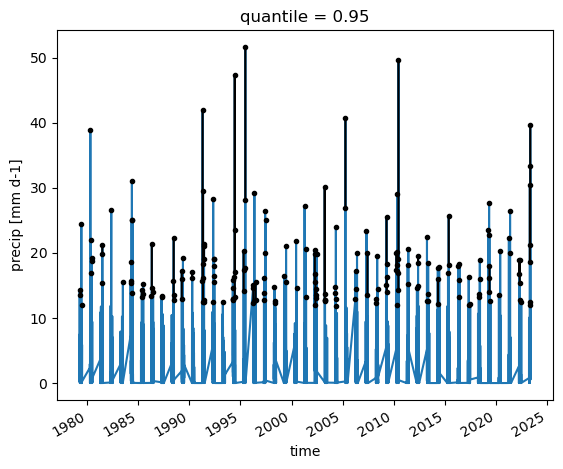

In [77]:
# lots of these are part of multi-day events so will need to look at this at some point - look at total precip perhaps?
# amj_rl = xclim.indices.run_length.rle(ts_amj > 12, index = "last")
ts_amj.plot()
amj_wetdays.plot(marker = ".", color = "k")

In [78]:
# save dates & amounts for further analysis
amj_wetdays.dropna("time", "any").to_netcdf("00_point-process-analysis/mswep_er_vwetdays_"+str(qq)+".nc")

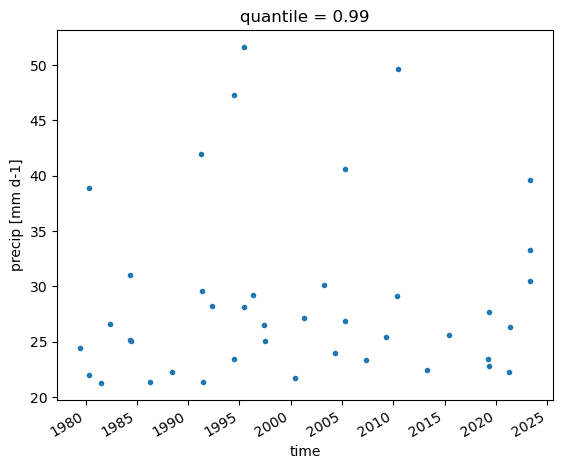

In [75]:
amj_wetdays.dropna("time", "any").plot(ls = "", marker = ".")